In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from marvin.tools import Maps
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

INFO: No release version set. Setting default to DR15


/packages/python3.6.8/lib/python3.6/site-packages/marvin/__init__.py:370: MarvinUserWarning: path /homes/asharma3/sas/dr15/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None.
  .format(value), MarvinUserWarning)
/packages/python3.6.8/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/packages/python3.6.8/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/packages/python3.6.8/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/packages/python3.6.8/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expec

In [3]:
DAP_all = fits.open("dapall-v2_7_1-2.4.1.fits", memmap=True)
DAP_table = Table(DAP_all[1].data)

In [4]:
MNGTARG1 = numpy.array(DAP_table['MNGTARG1'])  # Stores all data of MNGTARG1
Plateifu_all = numpy.array(DAP_table['PLATEIFU'])  # Stores platifu of all objects


primary_all = [Plateifu_all[i] for i in range(len(Plateifu_all)) if MNGTARG1[i] & 2**10 != 0]
secondary_all = [Plateifu_all[i] for i in range(len(Plateifu_all)) if MNGTARG1[i] & 2**11 != 0]
tertiary_all = [Plateifu_all[i] for i in range(len(Plateifu_all)) if MNGTARG1[i] & 2**12 != 0]


Plateifu_galaxies = primary_all + secondary_all + tertiary_all                          # Stores plateifu of all galaxies

Plateifu = list(set(Plateifu_galaxies))

error_list = []

# print(Plateifu)











# maps = Maps(Plateifu[0])
# print(maps.bintype)





/packages/python3.6.8/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


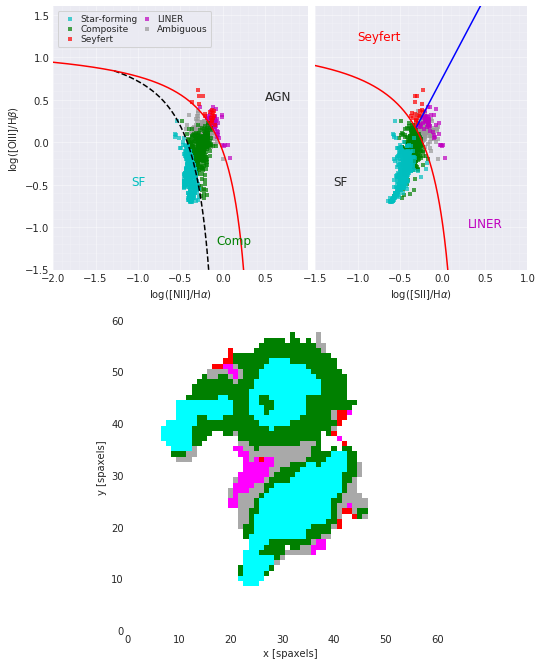

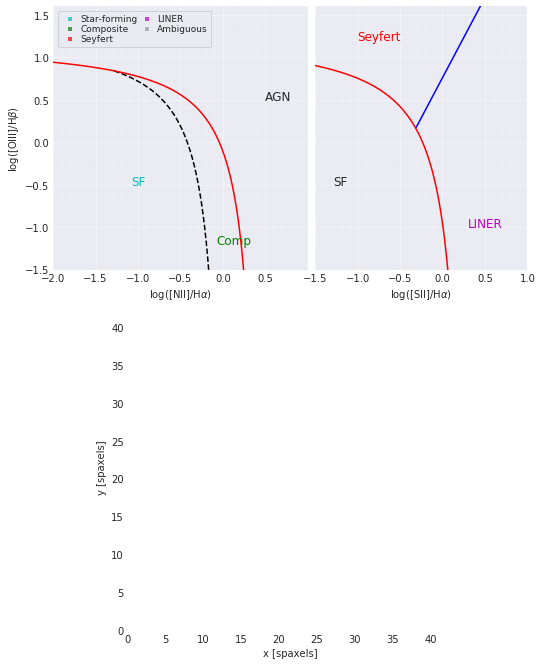

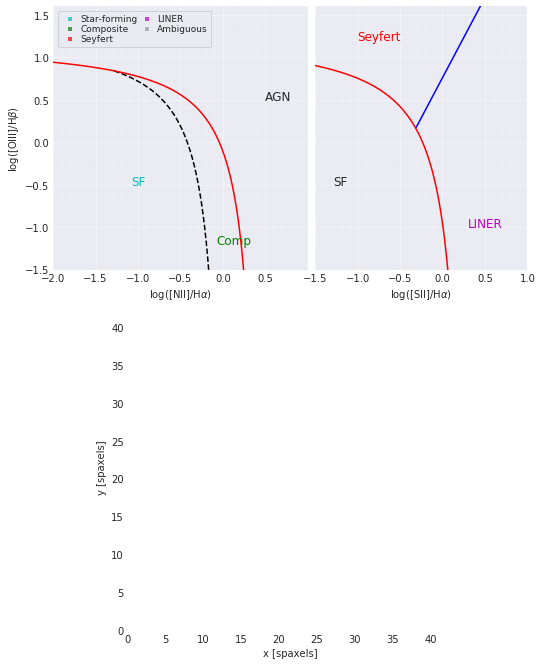

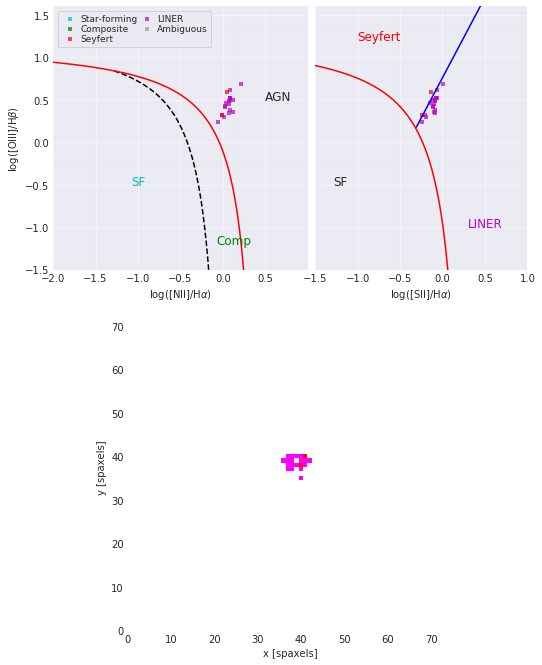

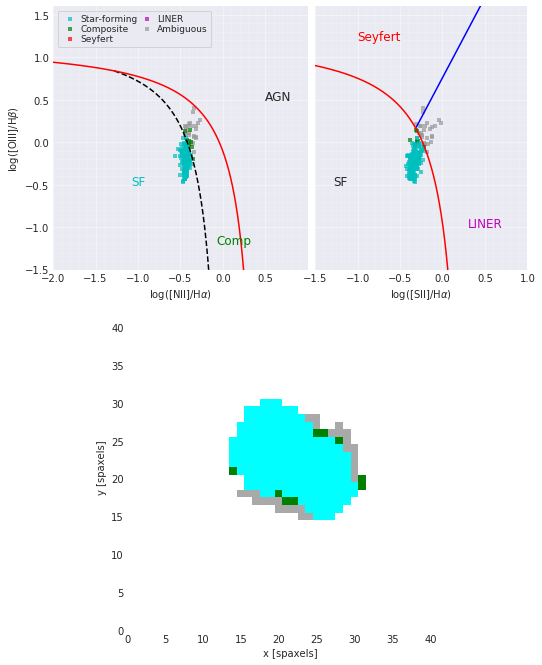

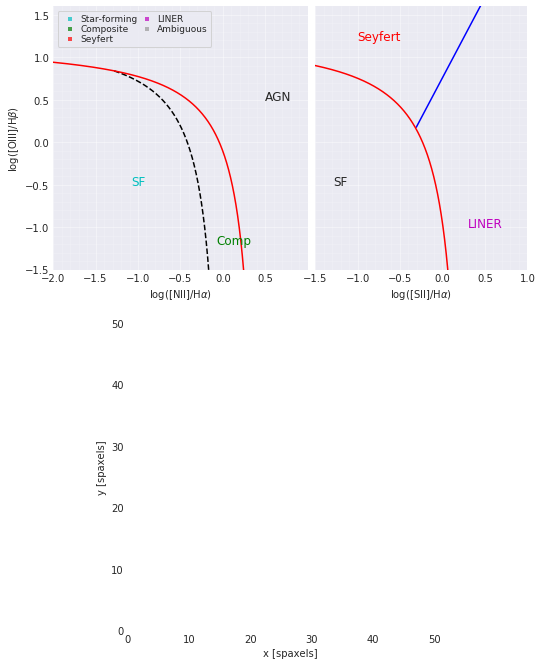

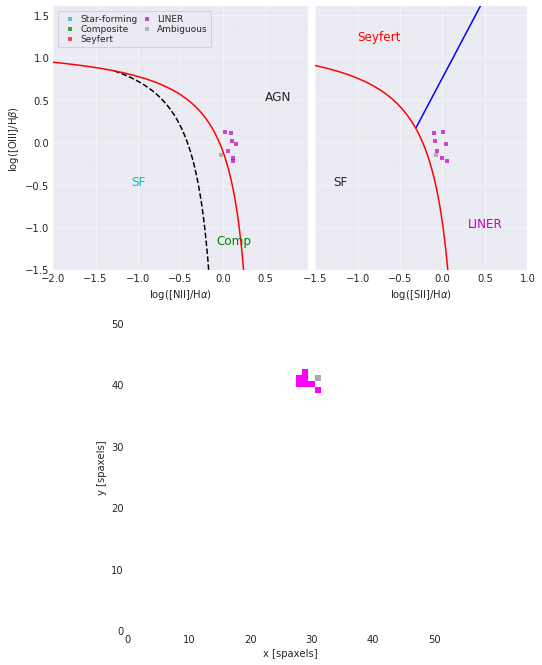

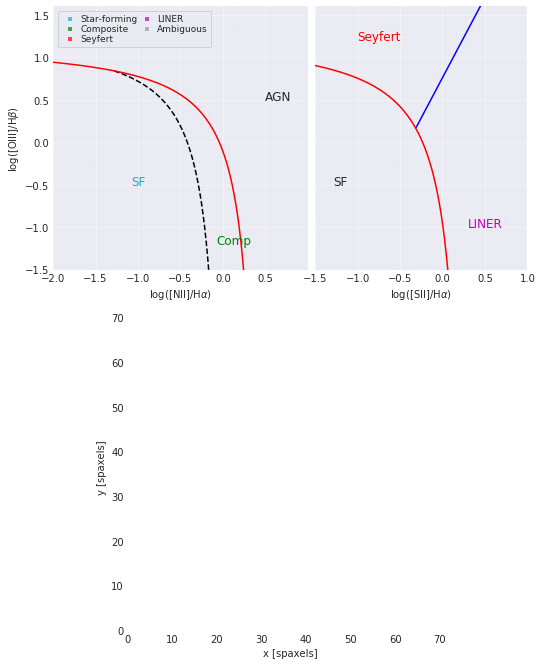

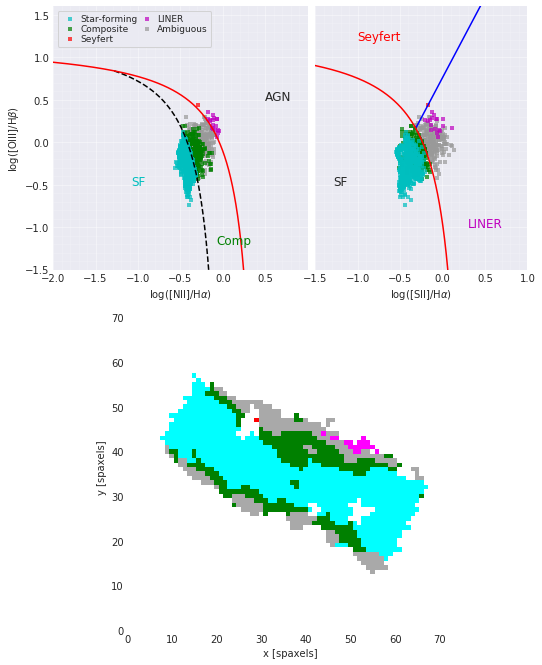

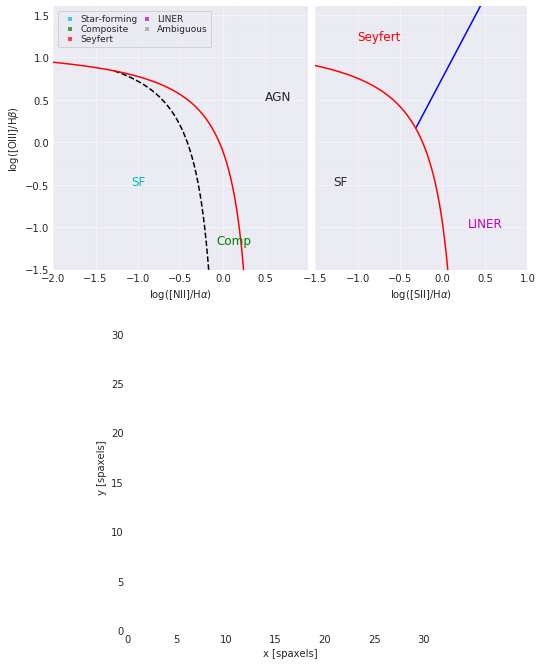

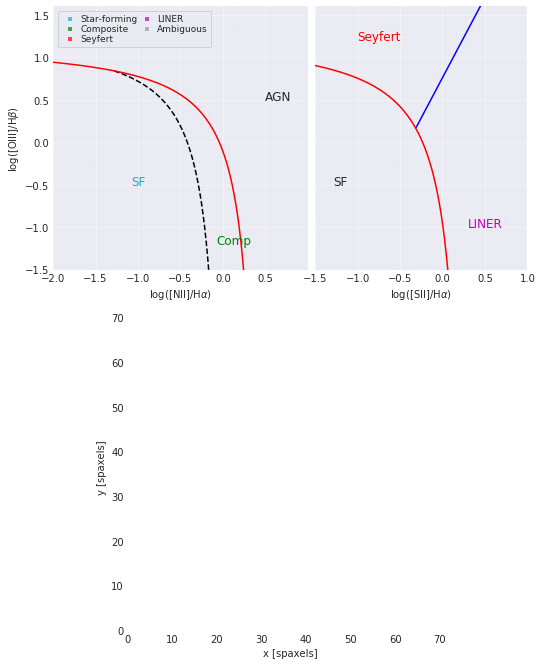

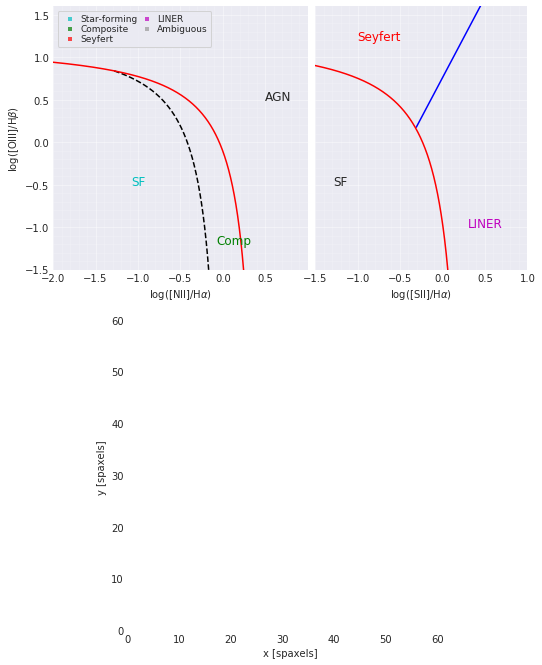

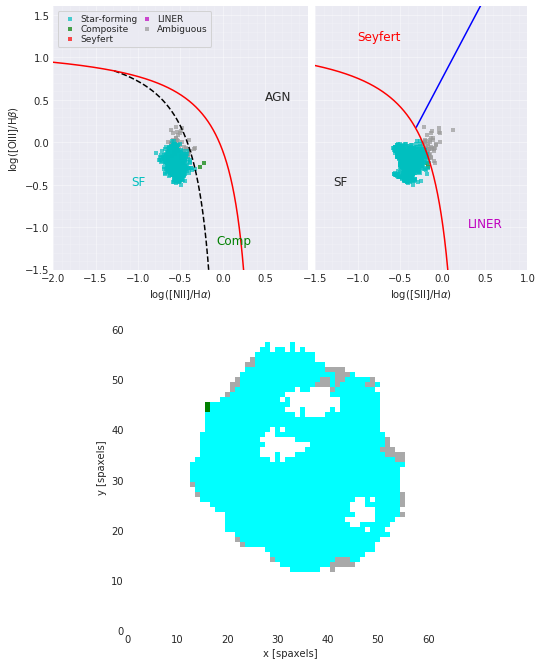

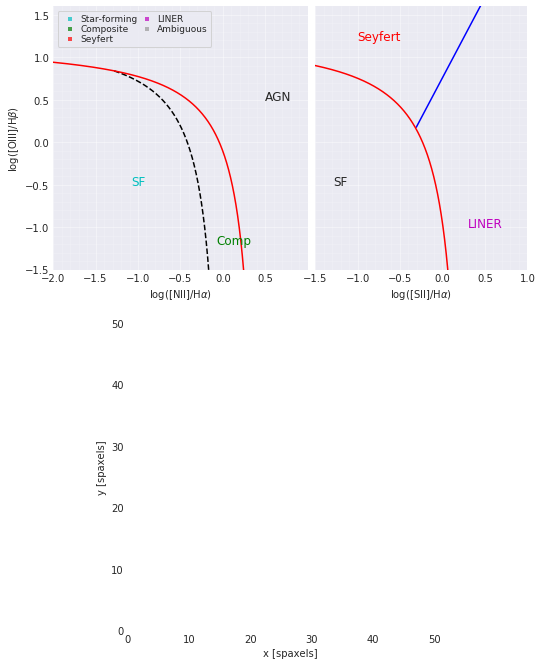

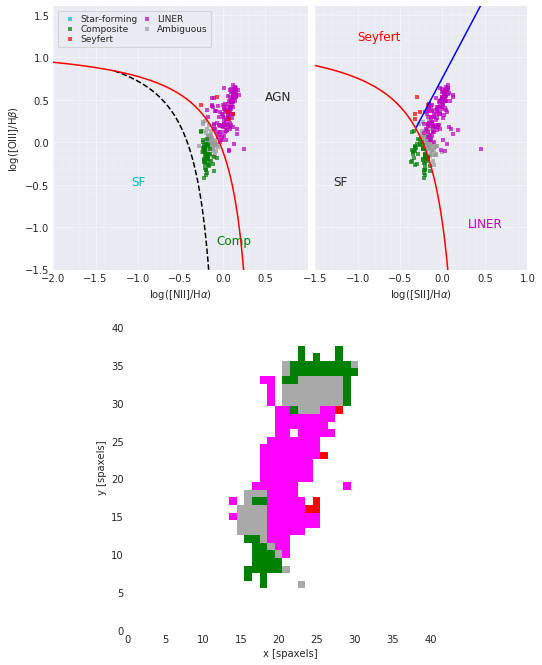

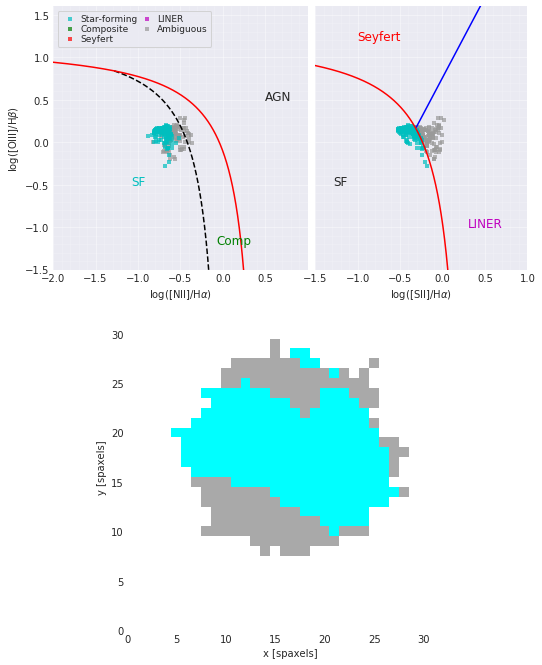

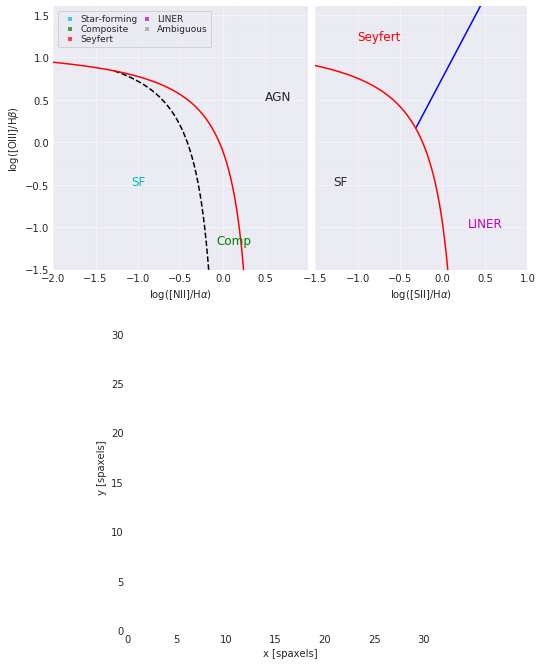

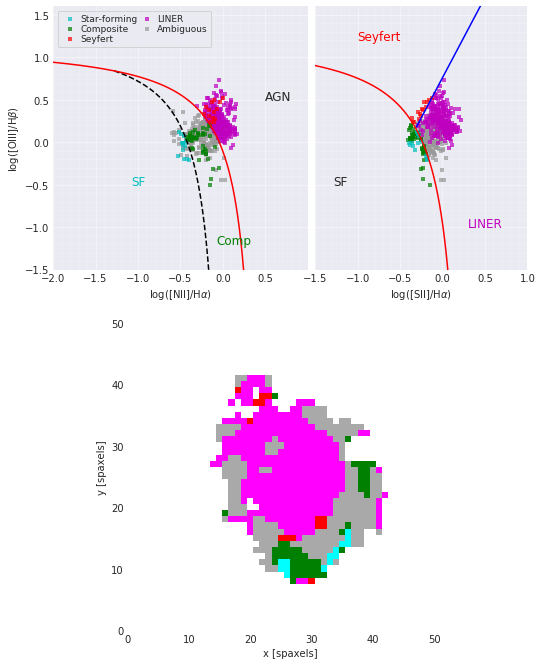

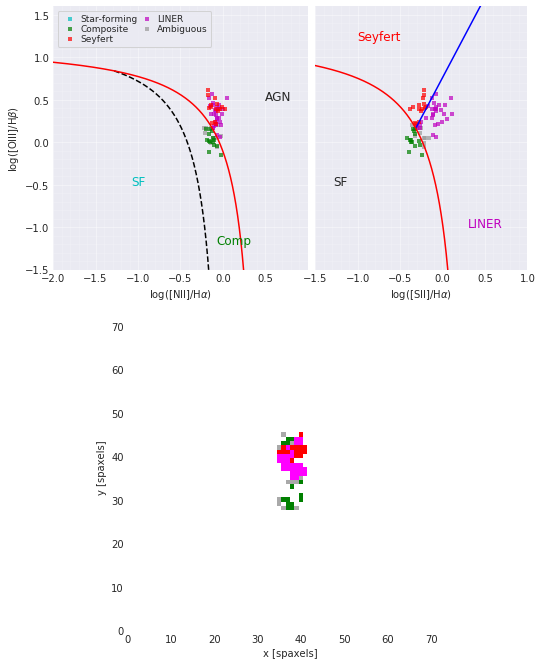

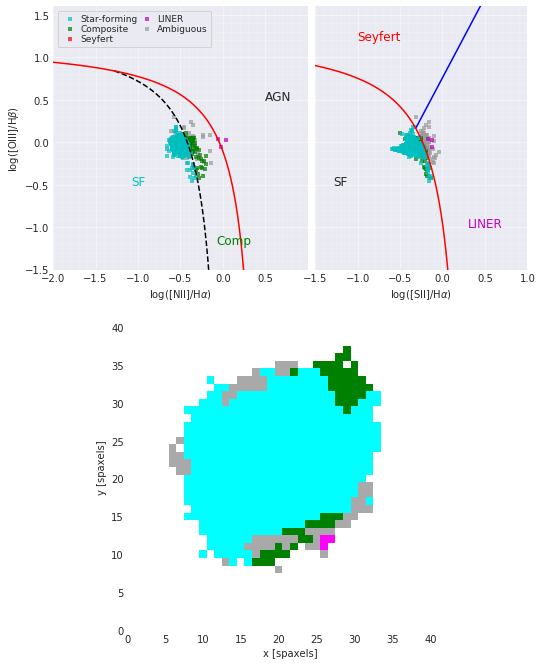

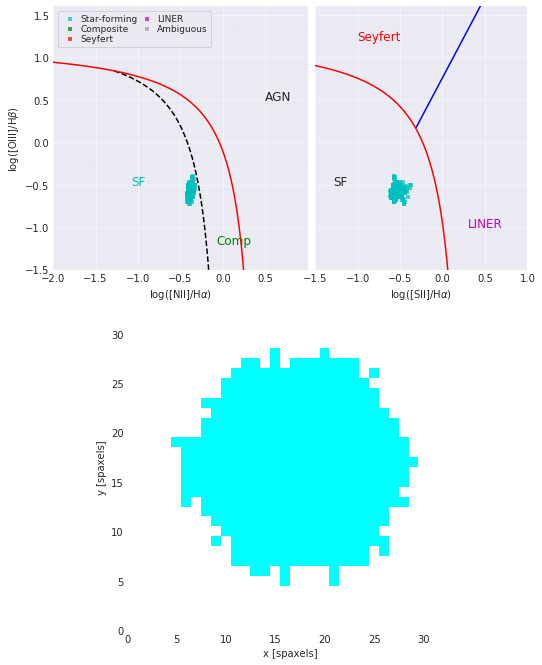

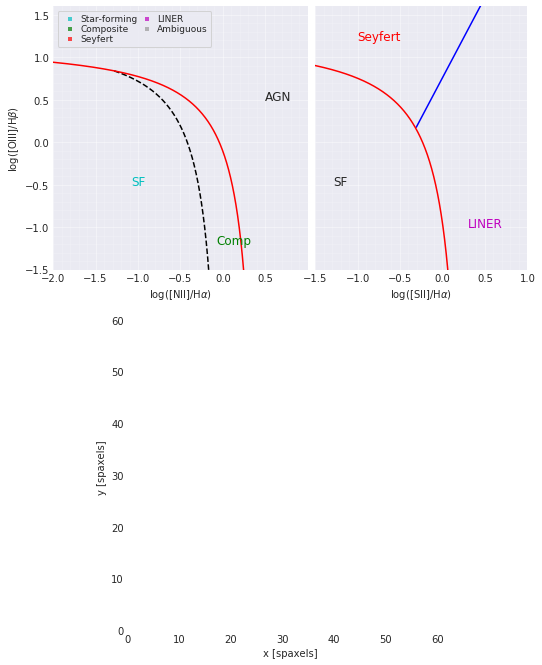

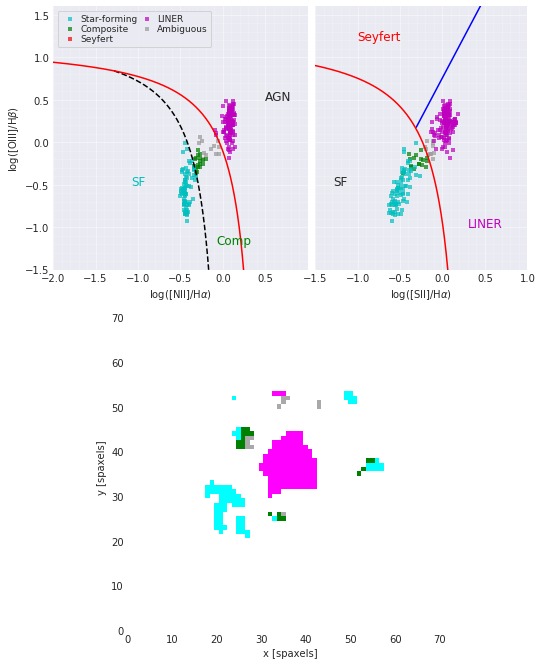

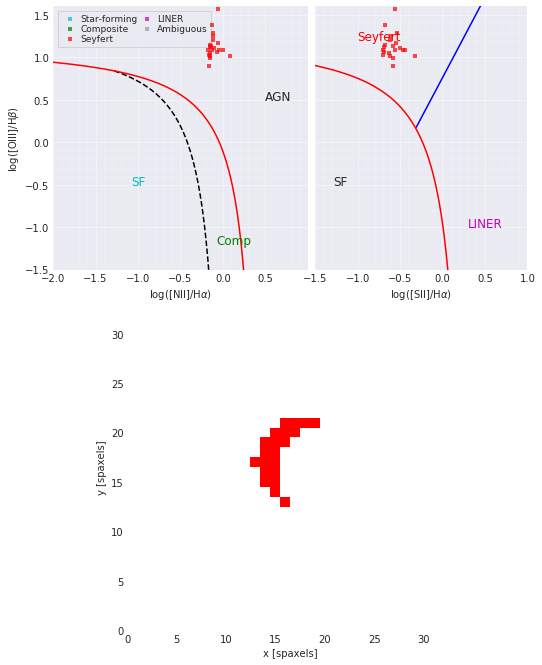

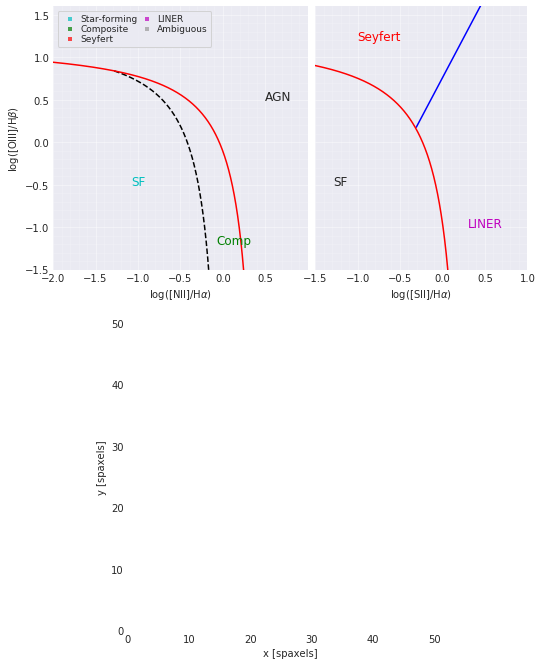

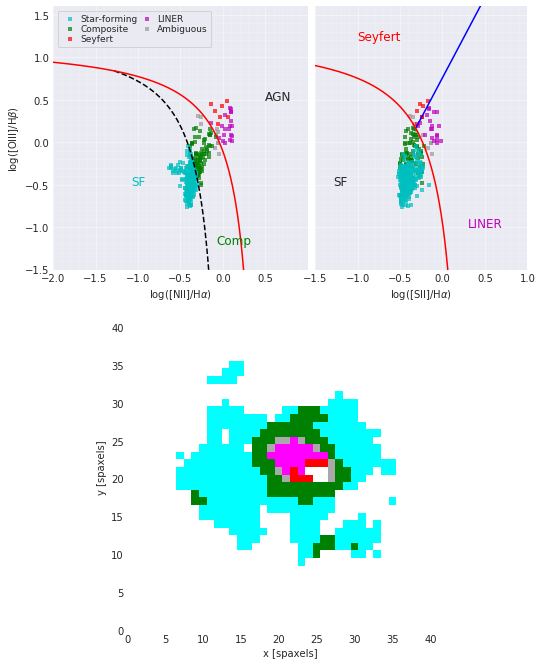

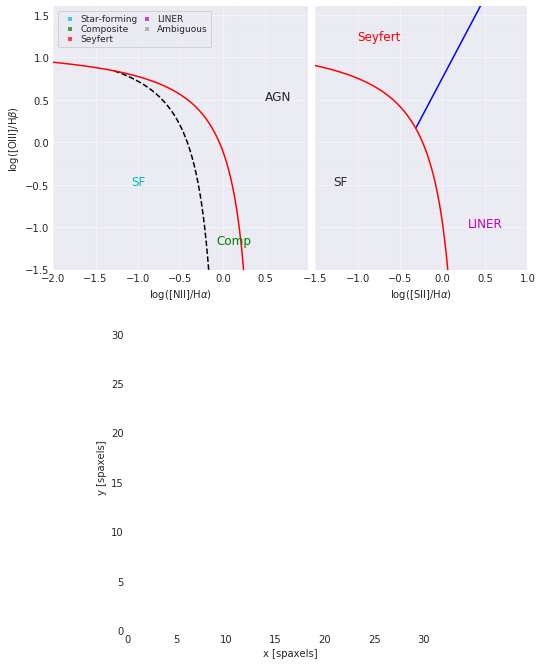

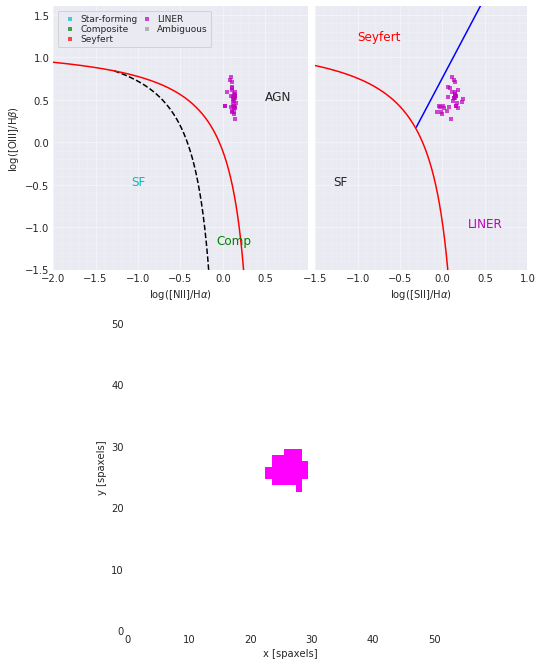

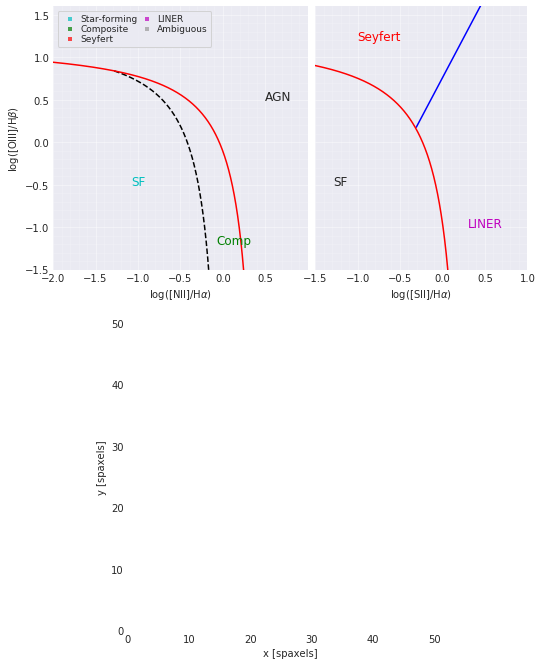

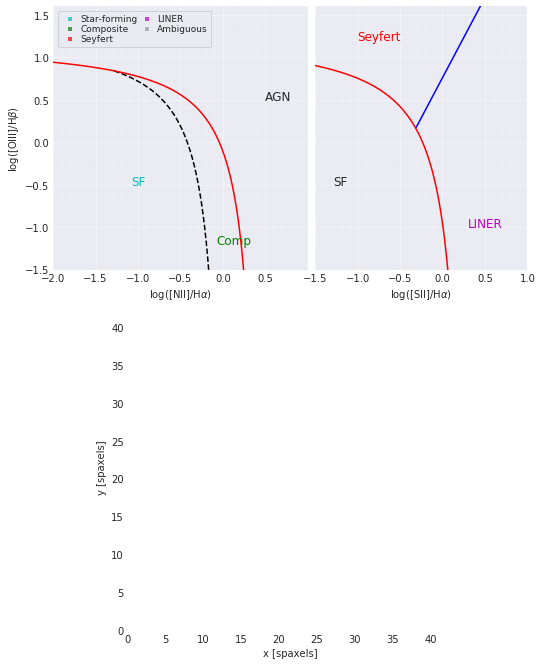

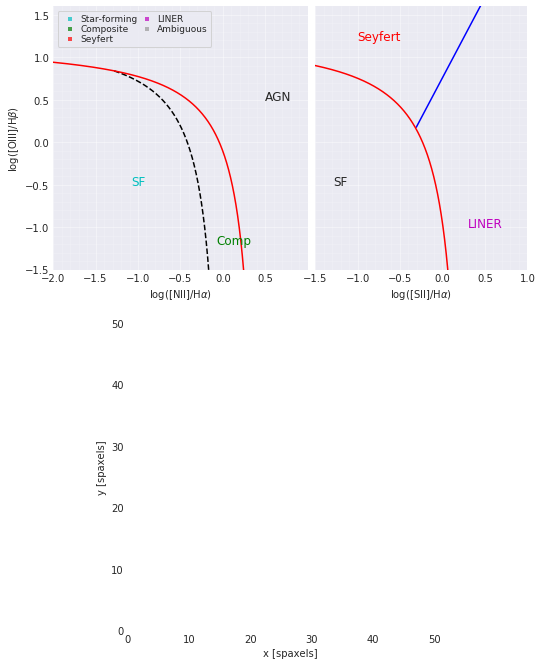

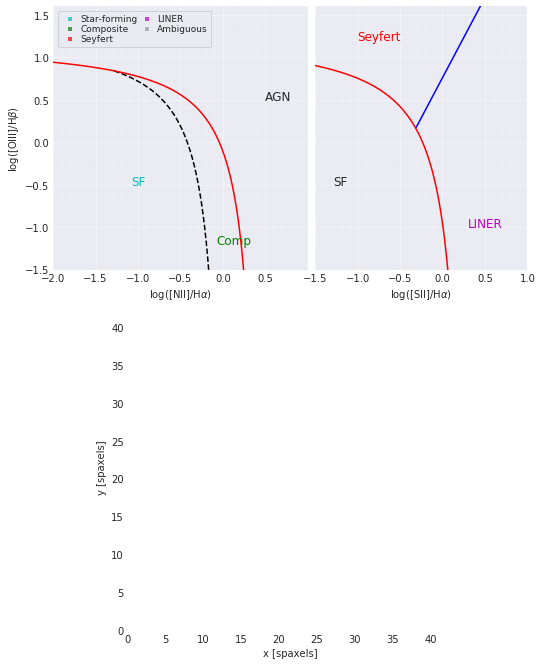

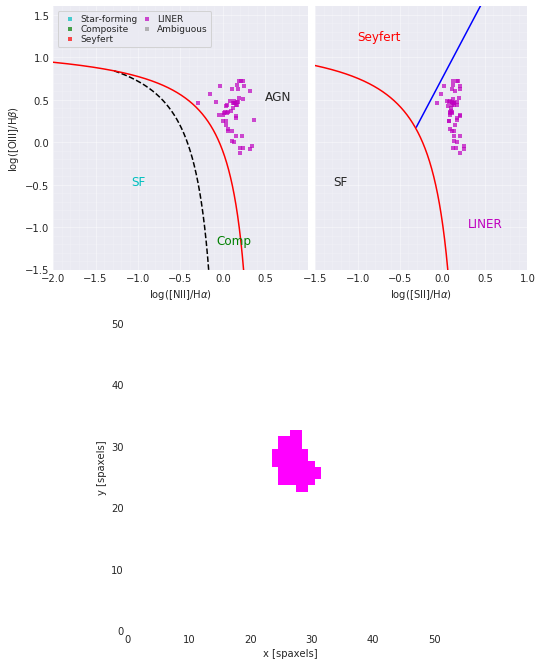

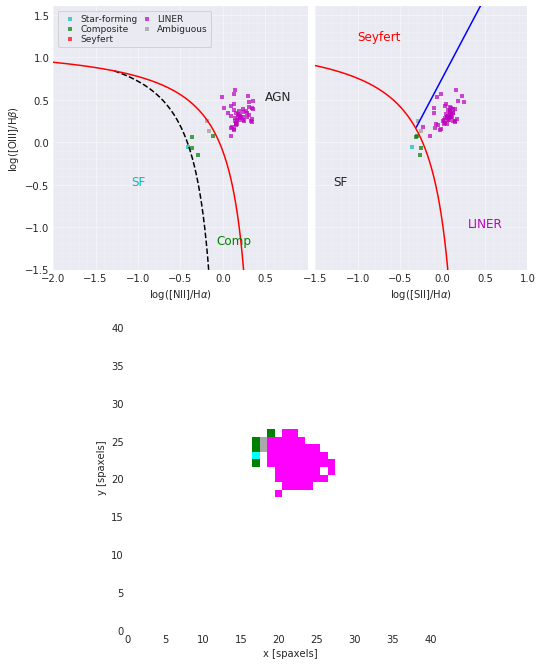

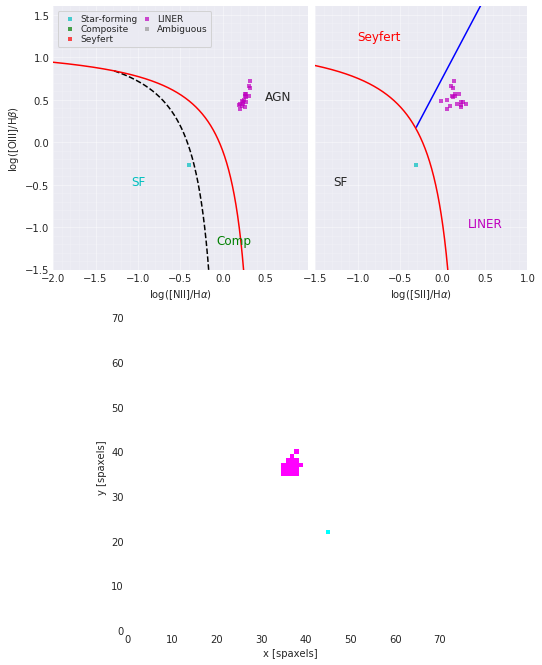

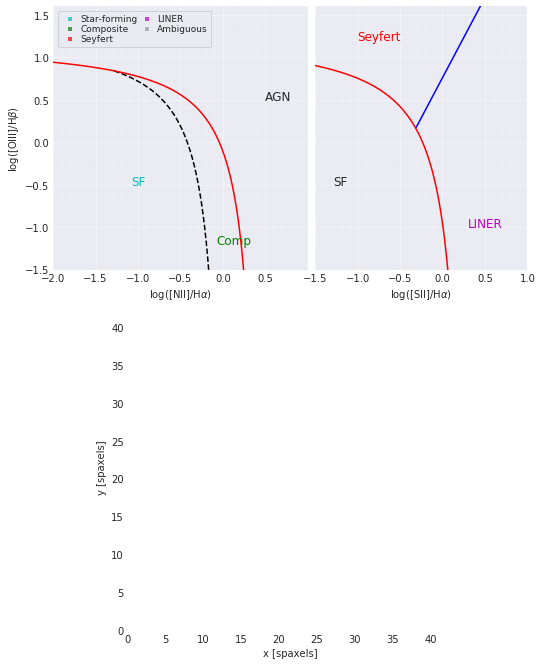

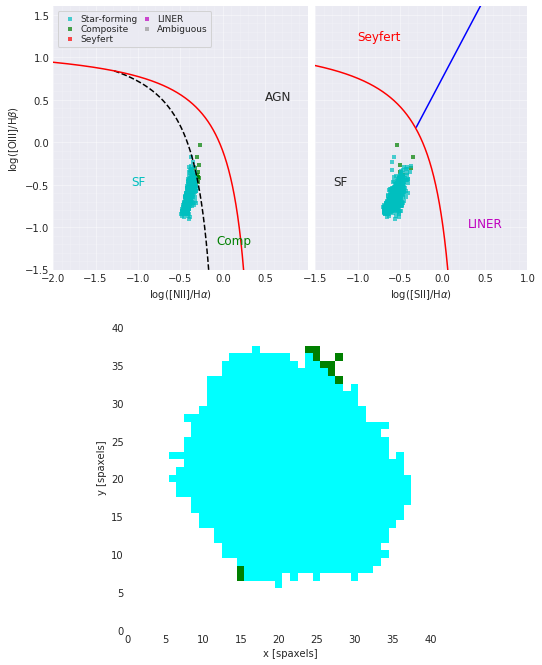

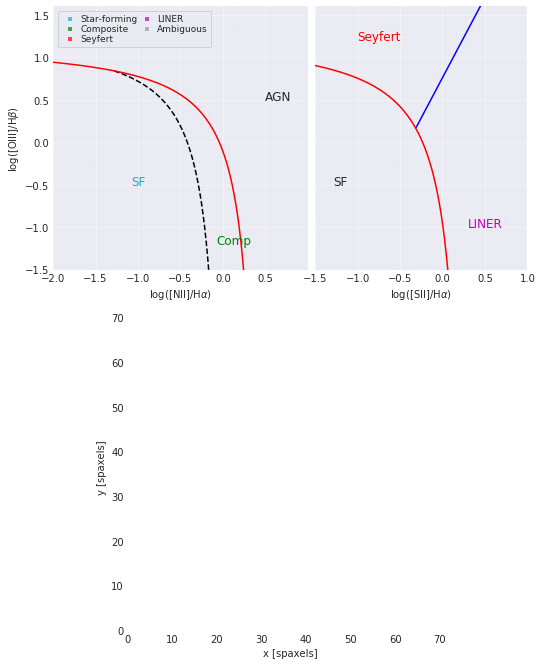

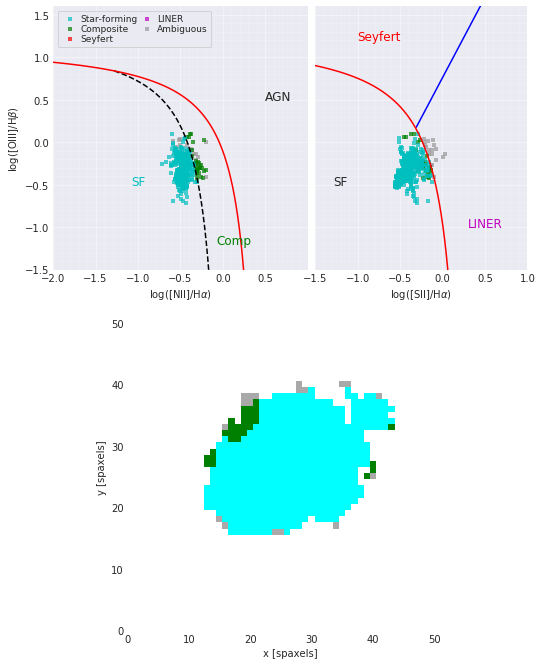

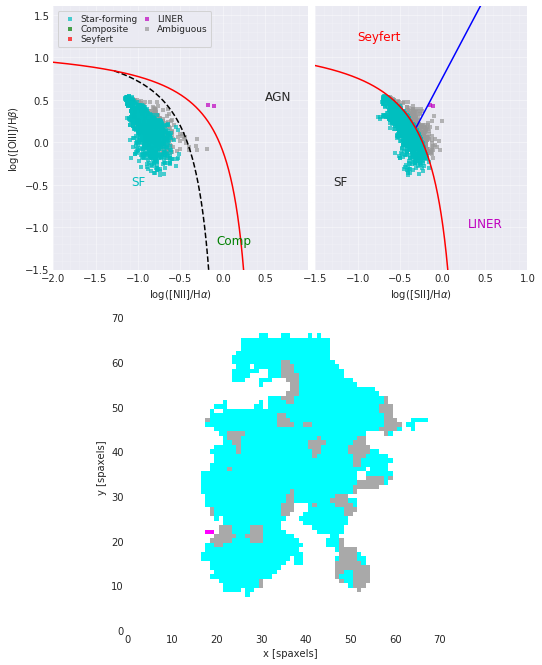

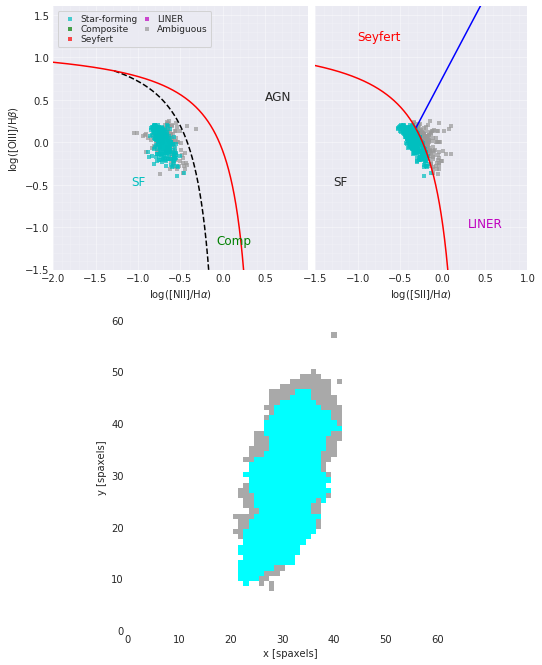

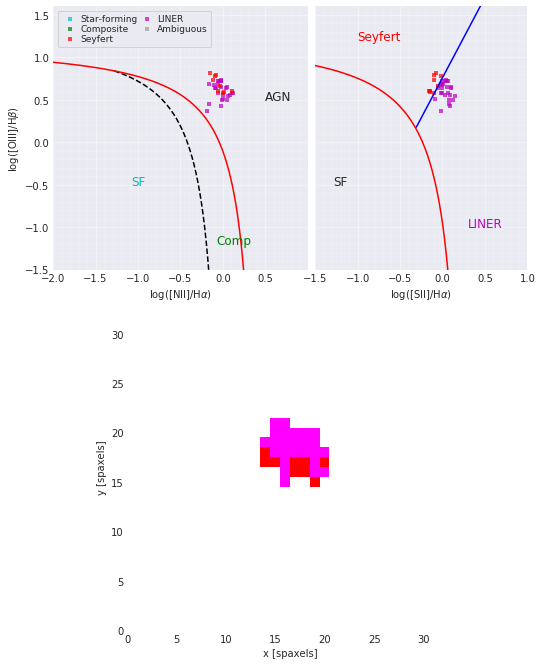

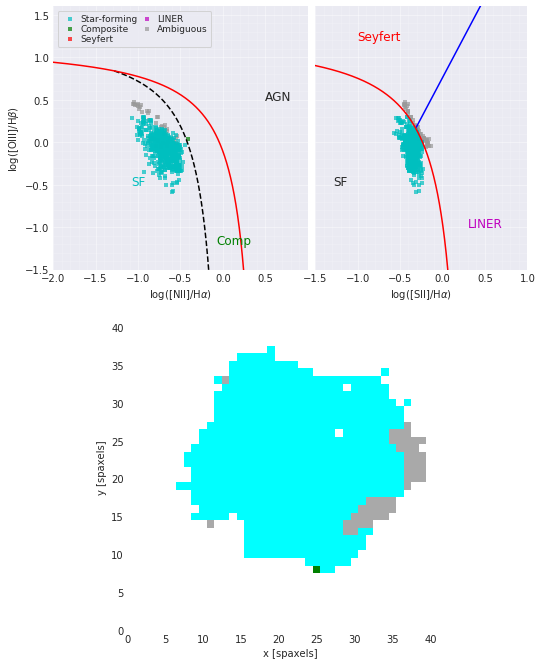

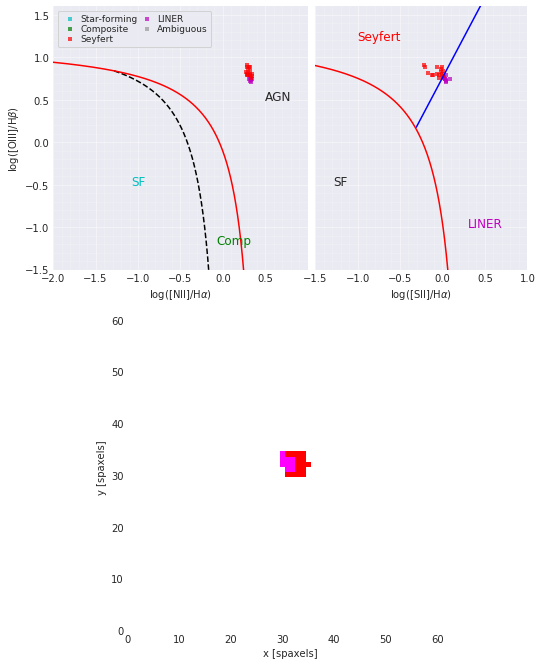

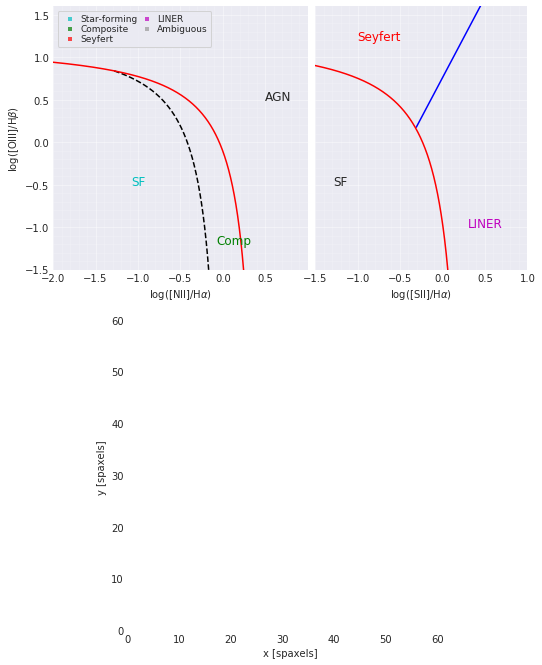

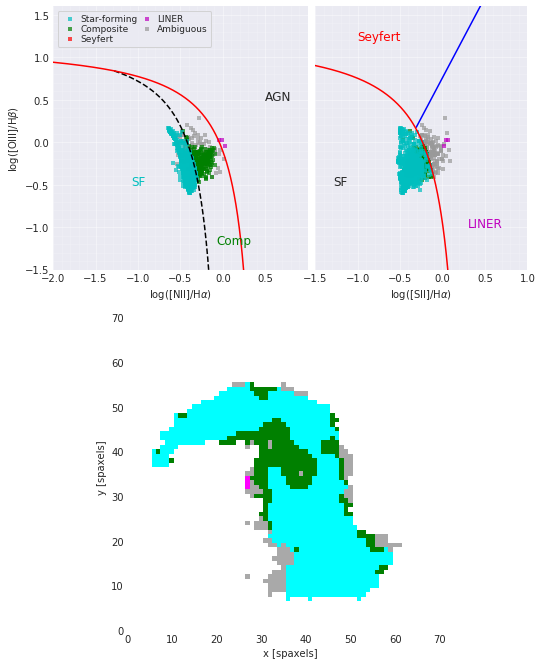

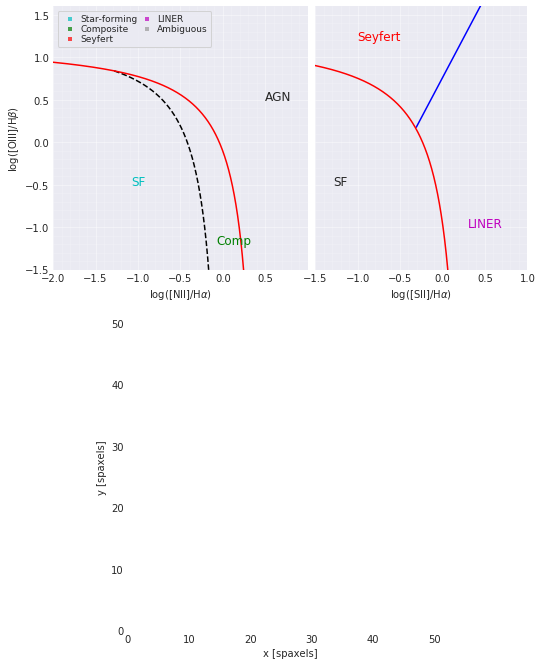

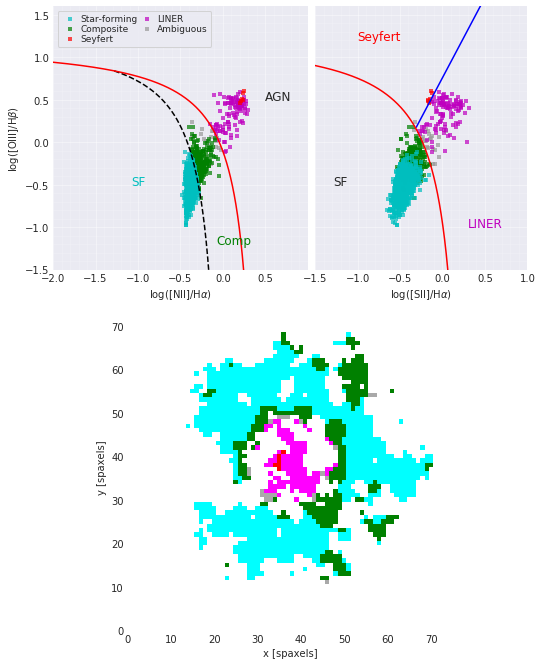

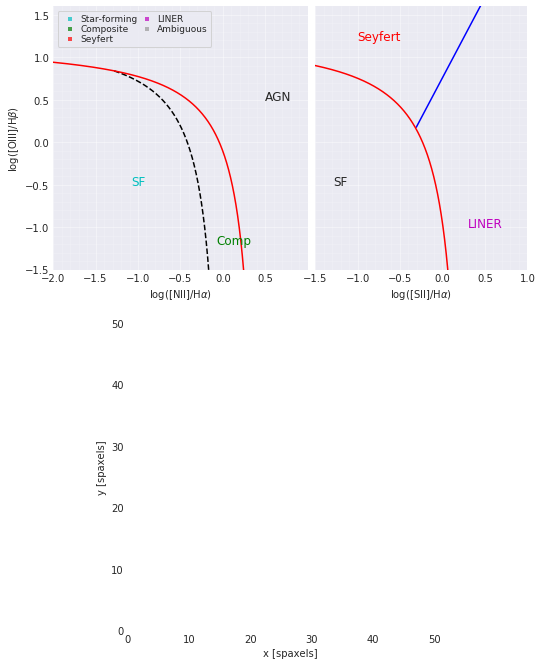

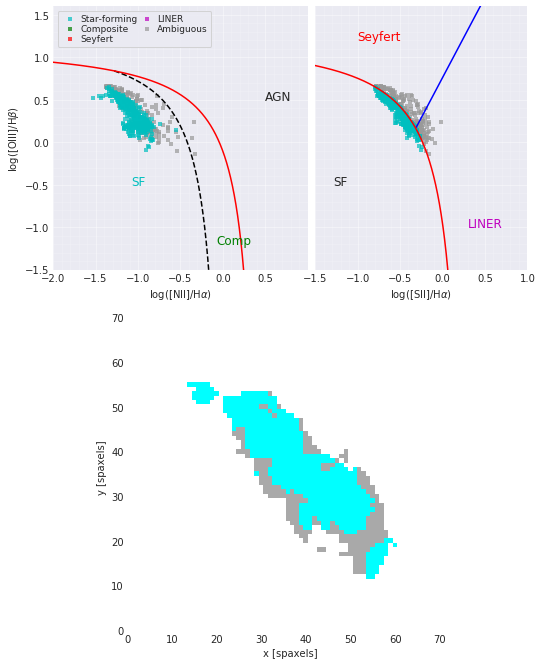

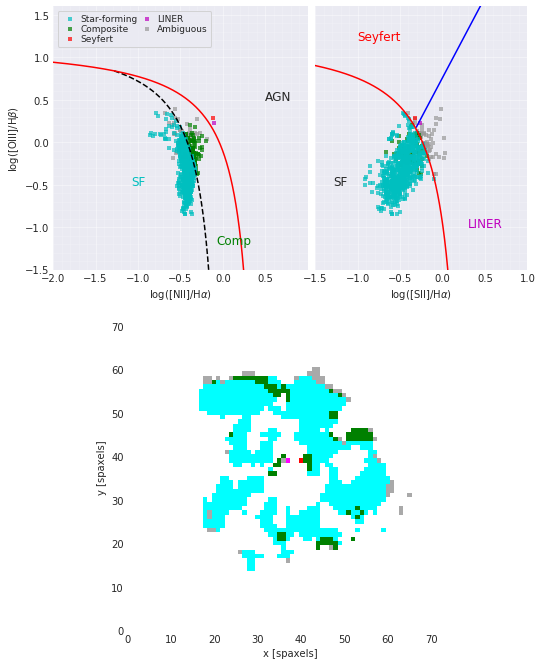

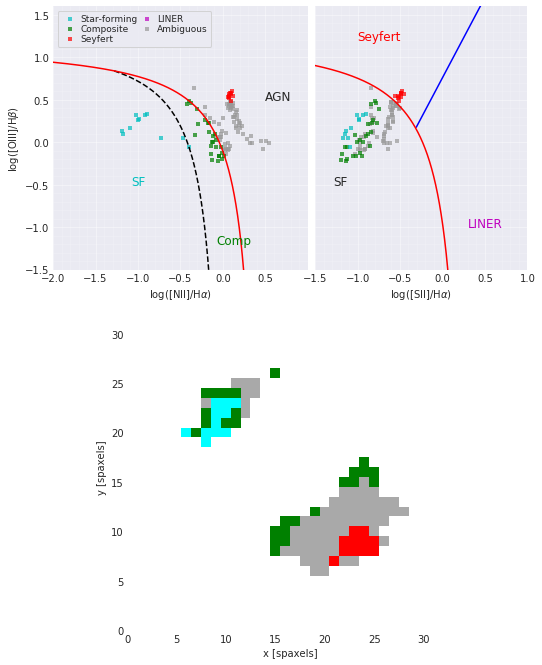

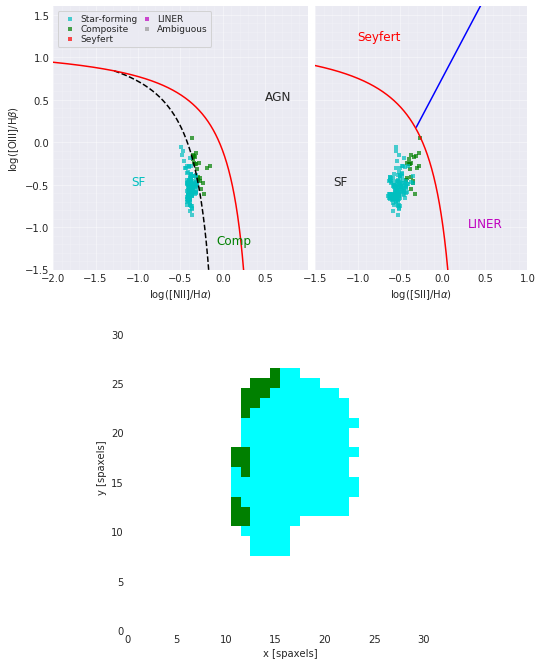

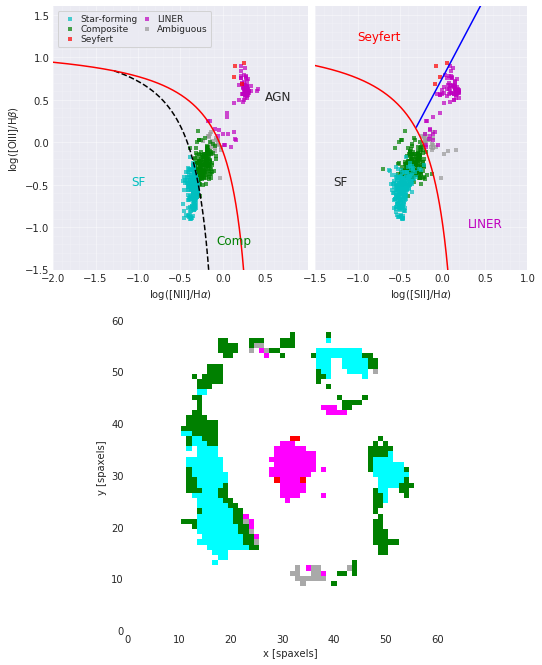

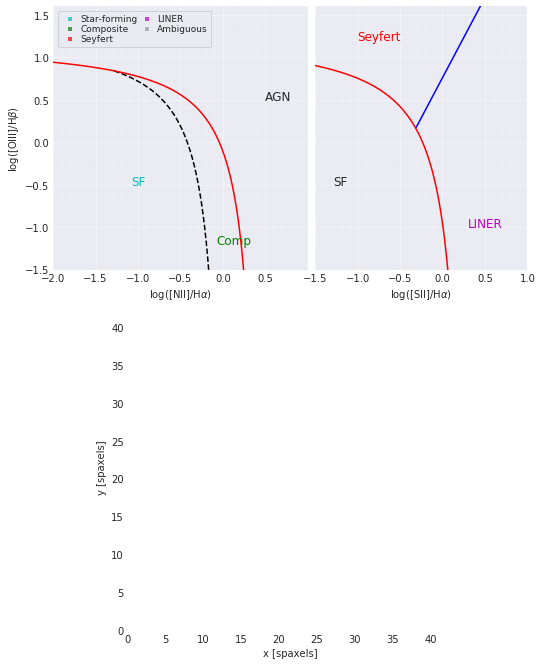

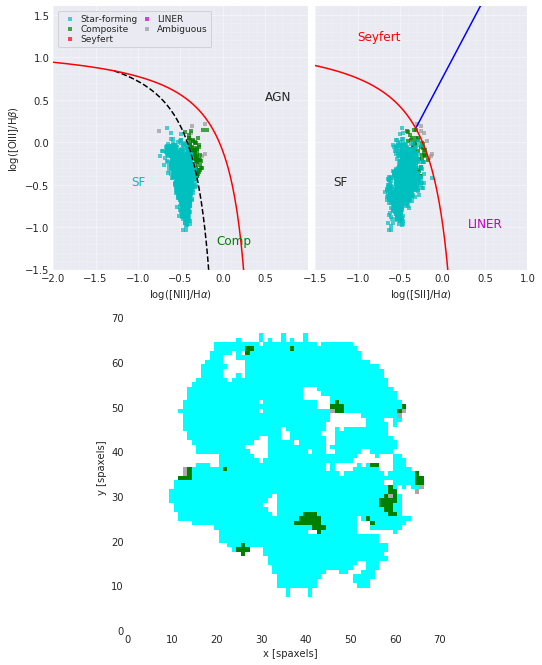

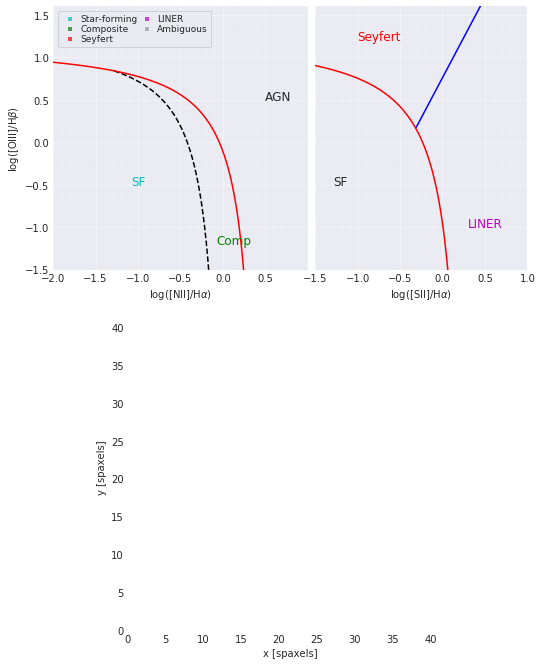

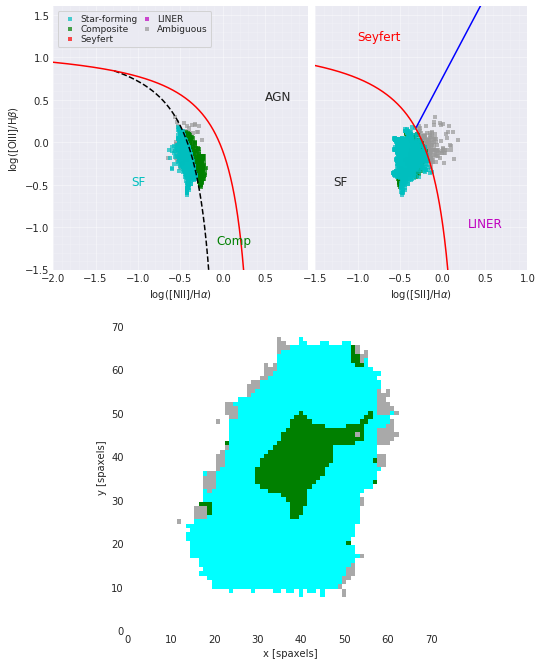

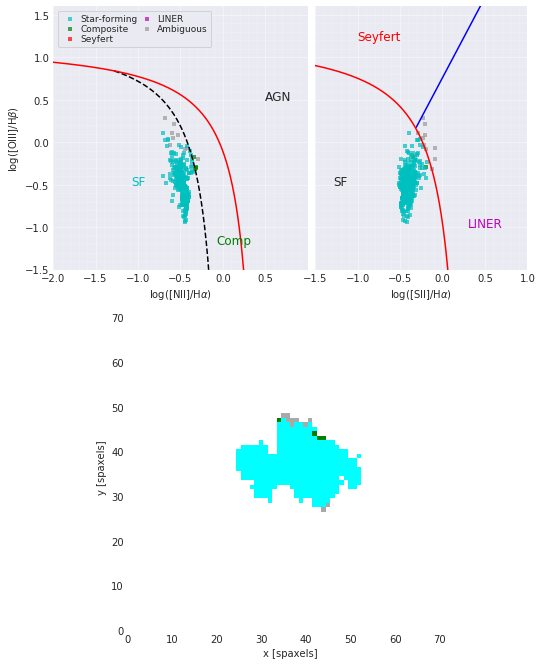

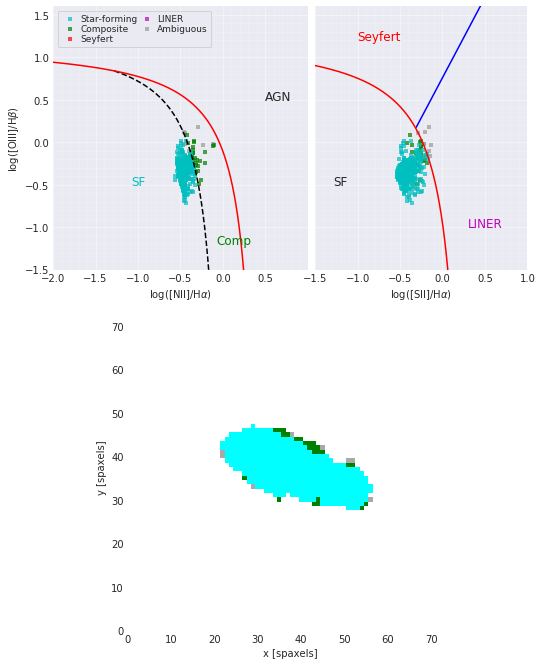

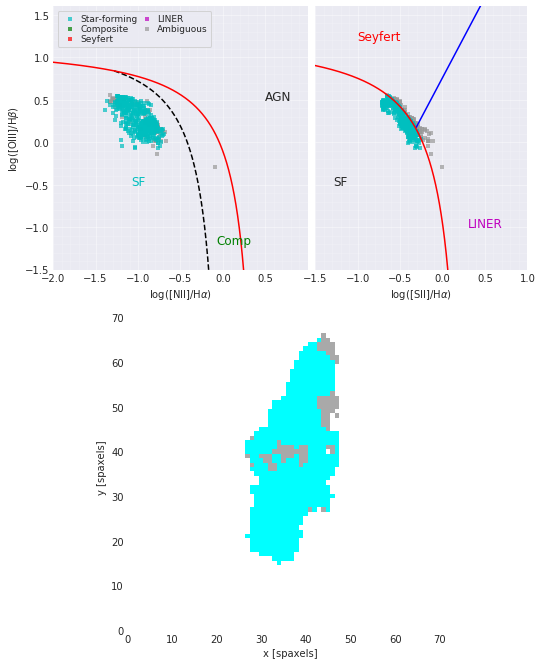

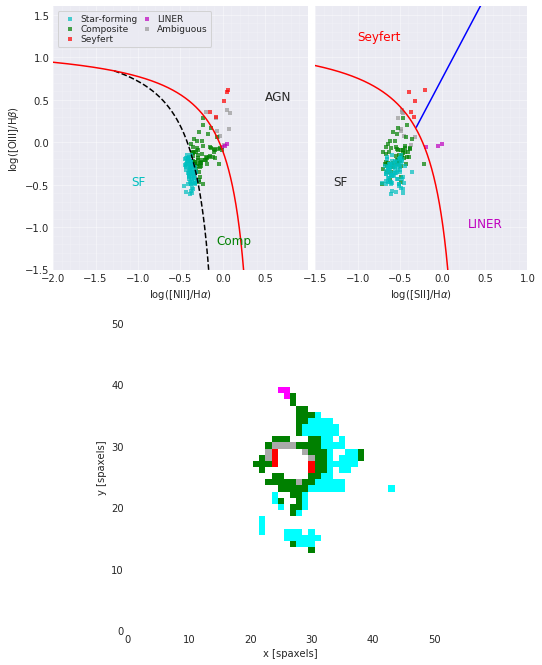

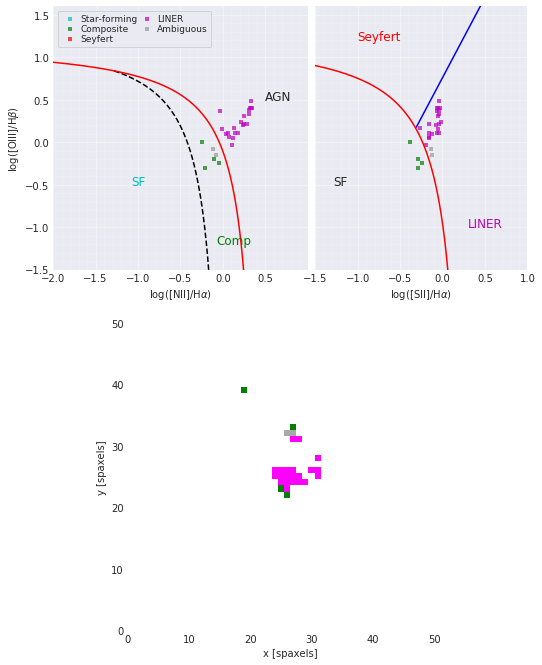

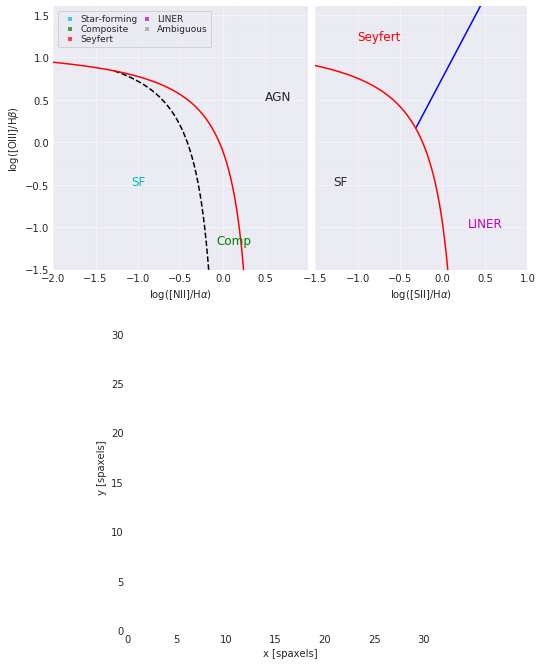

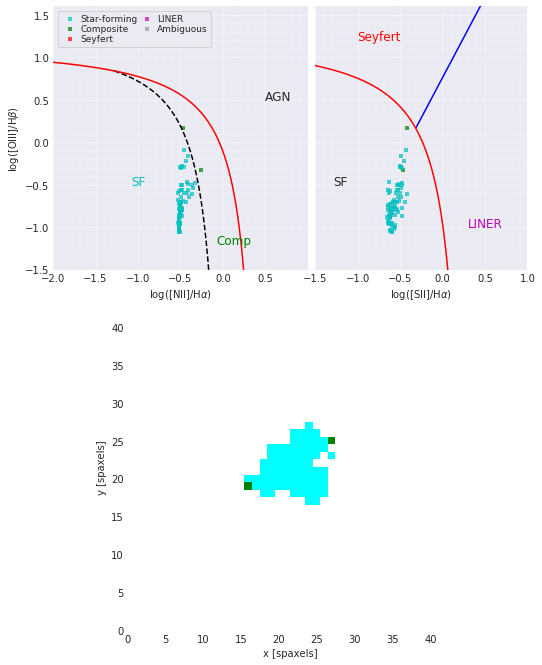

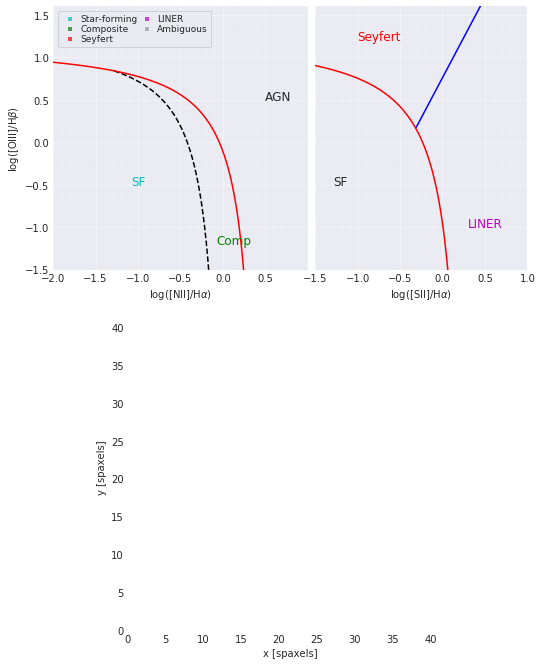

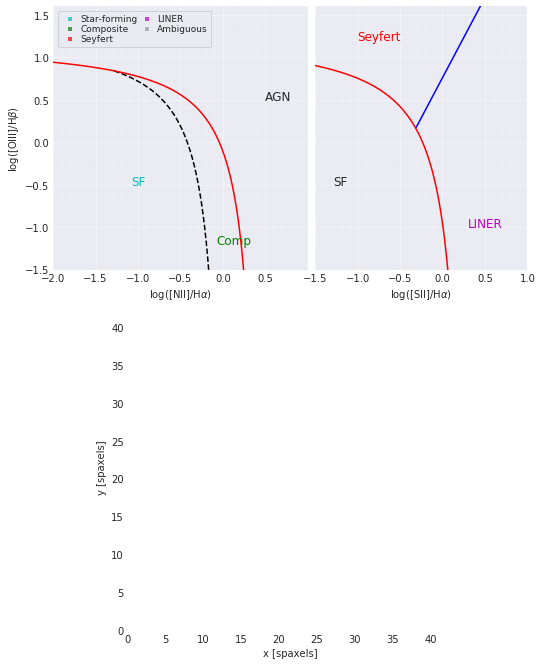

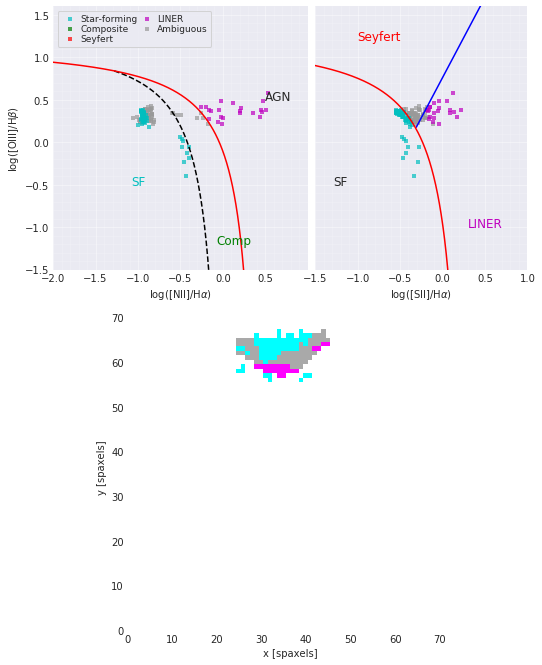

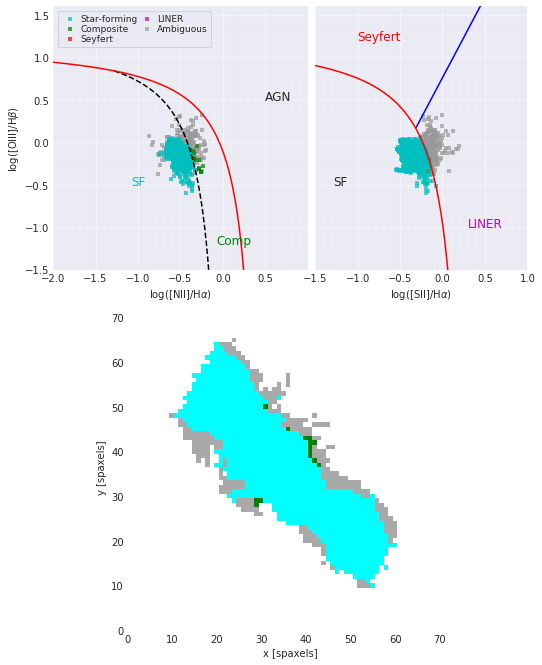

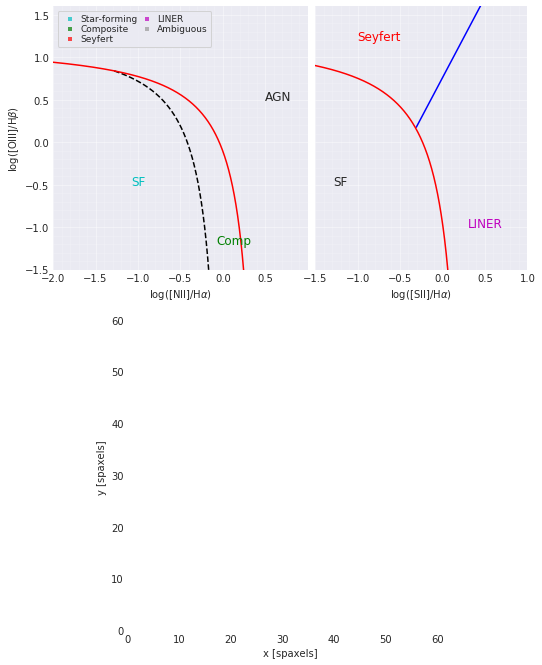

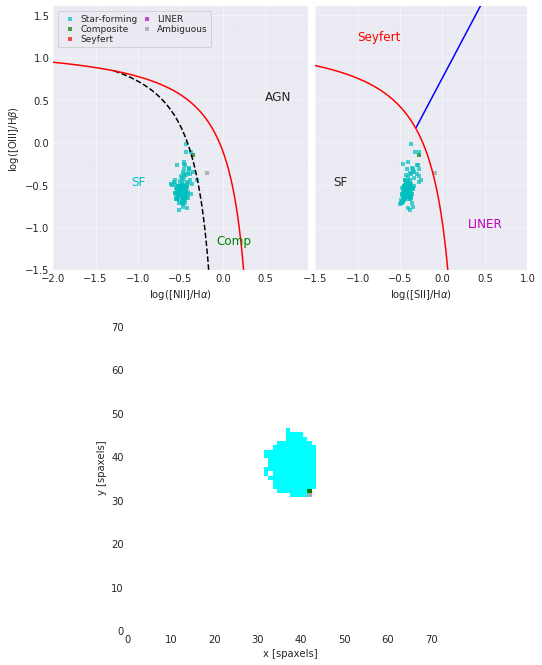

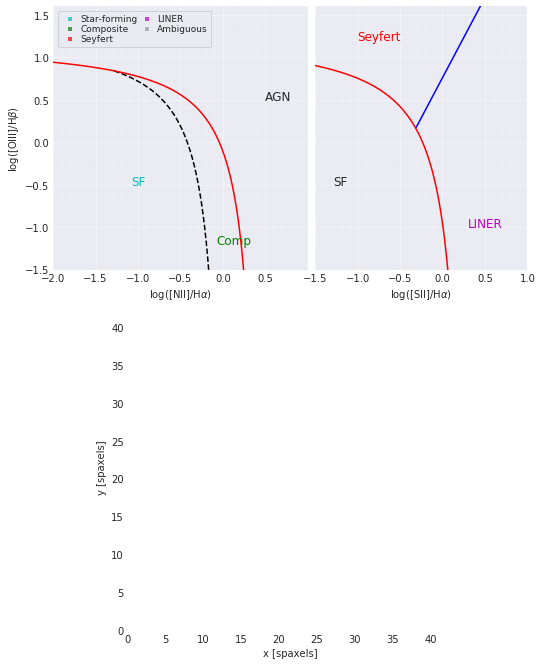

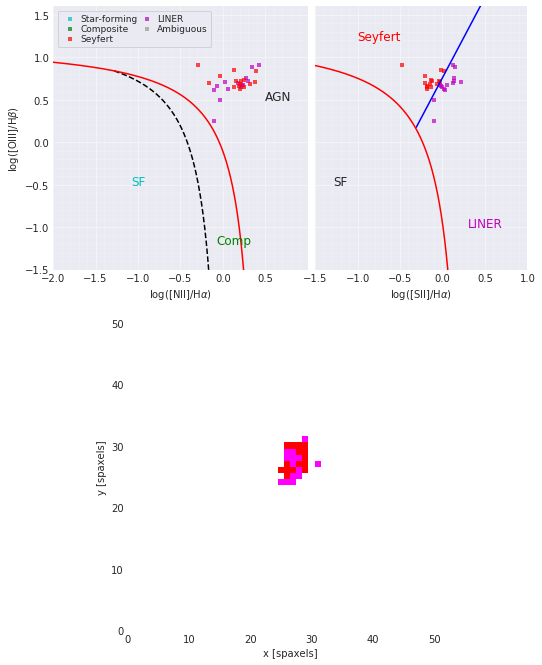

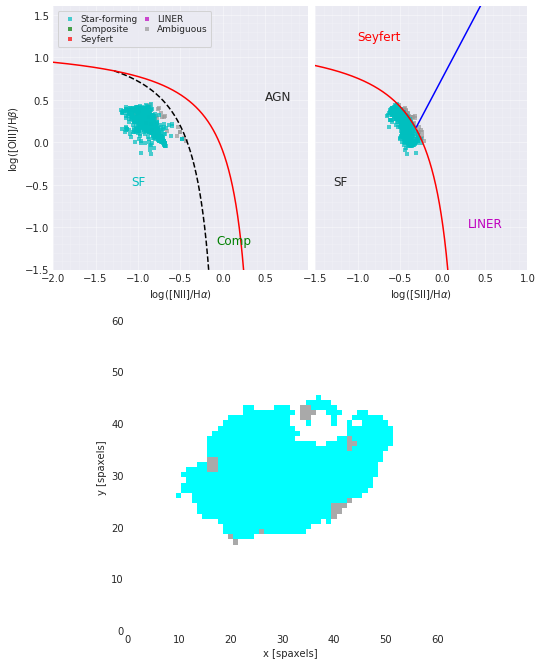

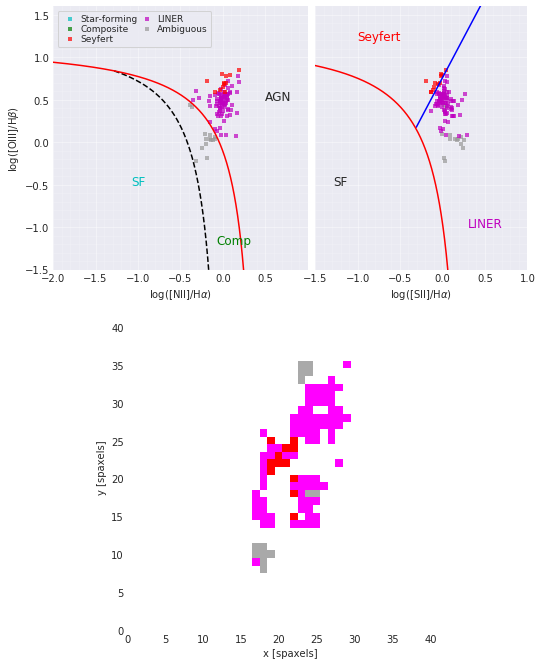

In [ ]:
for plateifu in Plateifu:
    try : 
        maps = Maps(plateifu)

        # make a BPT classification without OI
        masks, fig, axes = maps.get_bpt(use_oi=False)

        filename = "BPTwiseM*_" + plateifu
        location = 'BPTimages2/' + filename    #Same as the file
        fig.savefig(location)

    except :
        error_list.append(plateifu)
        continue
        
print('Successful !!!')
print(error_list)

In [ ]:
# Plateifu = []                                                                 # Stores plateifu of HYB10 galaxies
# Non_HYB10 = []                                                                # Stores plateifu of non-HYB10 galaxies

# i = 0
# while (i < 1000): 
#     a = tertiary_all[i : i + 314]
#     for x in a:
#         try:
#             maps = Maps(x)
#             if maps.bintype == 'HYB10':
#                 Plateifu.append(x)
#         except:
#             Non_HYB10.append(x)
#             continue
    
#     i += 314
    
    
# print(len(a))
# print(len(Plateifu))
# print(len(Non_HYB10))
